#**Estatística no Python**
###Material para apresentação Jornada Virtual da ECEC   21-23/05/2020
### Responsável: Matheus Sanclé Bueno Barbosa (IC - Curso de Engenharia da Computação)
### Orientadora: Profa. Dra. Maria José Pereira Dantas
### Grupo de Pesquisa em Otimização Clássica e de Inteligência Computacional
### Laboratório de Estatística e Modelagem Matemática



##**1. Importação de Bibliotecas e Funções Implementadas:** 

####**1.1. Bibliotecas:** 

In [1]:
# Ferramentas Estatísticas
# Síntaxe de importação e Apelidos
import numpy as np
import pandas as pd
import statistics as st
import scipy.stats as sp
import scipy.signal as ss
import statsmodels.graphics.gofplots as qq

#Ferramentas para Análise Gráfica
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.io as pio
import plotly.express as px
import folium

#Outros
import random as rd
from google.colab import files
import warnings
warnings.simplefilter(action='ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


####**1.2. Resumo Estatístico Manual (Função):** 

In [0]:
# Implementação de um Resumo Estatístico Manual:
# Bibliotecas: Statistics, NumPy, SciPy.stats e pandas.Series()
def resumo_estatistico(distribuicao):
  dist = distribuicao
  dist_series = pd.Series(dist)
  try:
    moda = st.mode(dist) # Valores totalmente distintos, retorna erro
  except Exception as StatisticsError: # Tratamento do Erro
    moda = "-"

  media = st.mean(dist) 
  mediana = st.median(dist) 
  quartil_1 = np.quantile(dist, 0.25)
  quartil_2 = np.quantile(dist, 0.50)
  quartil_3 = np.quantile(dist, 0.75)
  minimo = np.min(dist)
  maximo = np.max(dist)
  amplitude = maximo - minimo
  dq = quartil_3 - quartil_1  
  dsv_padrao = st.stdev(dist)
  dsv_med_abs = dist_series.mad()
  variancia = st.variance(dist)
  coef_variacao = sp.variation(dist)
  

  # Gerando um Dicionário com as informações:
  dic_resumo = {'Informação': ['Média', 'Mediana', 'Moda', 'Mínimo', 'Máximo', 'Amplitude', 'Quartil 1', 'Quartil 2', 'Quartil 3', 'desvio interquartil','Desvio Padrão', 'Desvio Médio Absoluto', 'Variância','Coeficiente de Variação'],
          'Valor':[media, mediana, moda, minimo, maximo, amplitude, quartil_1, quartil_2, quartil_3, dq, dsv_padrao, dsv_med_abs, variancia, coef_variacao]}

  # Gerando um DataFrame a partir do Dicionário        
  df_resumo = pd.DataFrame(dic_resumo)
  return df_resumo

####**1.3. *Tips* - Conversão de dados categóricos (Função):**

In [0]:
def tips_numerico(base_tips):
  tips = base_tips
  
  # Selecionando todas as colunas com dados Categóricos/Qualitativos
  dados_qualit = tips.select_dtypes(include = 'category').columns.to_list()

  # Selecionando todas as colunas Categóricas que podem assumir dois tipos de valores
  dados_qualit_bin = [i for i in dados_qualit if not i == 'day']

  # Criando uma lista com as opções de cada categoria
  nomes_col_cat = []
  for i in dados_qualit:
    aux = tips[i].unique().to_list()
    nomes_col_cat.append(aux)

  # Adicionando ao DataFrame Tips as novas colunas com os valores convertidos em 0 ou 1
  # [Female, Male], [No, Yes], [Dinner, Lunch] = [0, 1]
  j = 0
  for i in dados_qualit:
      tips[i+'_num'] = np.where(tips[i] == nomes_col_cat[j][0], 0, 1)
      j += 1

  # Como a variável "Day" possui mais de 2 opções de resposta, são criadas colunas para cada opção de dia
  day_df = pd.get_dummies(tips['day'])

  # É feita a adição das novas colunas ao DataFrame do Tips
  new_df = pd.merge(tips, day_df, right_index=True, left_index=True)

  # De todo o DataFrame é selecionado apenas as colunas que possuem dados númericos
  df_new = new_df.select_dtypes(include=np.number)
  
  return df_new

##**2. Análise Univariada:** 

####**2.1. Descrição de uma Variável Simples:** 

In [4]:
# Cria um pandas.Series() dos dados
dados = [10, 7, 67, 63, 45, 42, 34, 39, 25, 21, 18, 16, 60, 2, 52, 58, 29, 9, 3, 56]

tam = len(dados)
print("- Conjunto de Dados:\n", dados, "\n")

# Cria um pd.Series() do conjunto de dados criados
# Uma Série é útil pois possibilita a indexação dos dados
index = range(1, tam + 1)
serie_dados = pd.Series(dados, index)

# Resumo Estatístico Automático: Ferramenta Describe() da Biblioteca Pandas, oferecendo um resumo simples estatístico do conjunto de dados
resumo_series = serie_dados.describe()
print("- Resumo Estatístico gerado a partir da Biblioteca Pandas: \n")
resumo_series

- Conjunto de Dados:
 [10, 7, 67, 63, 45, 42, 34, 39, 25, 21, 18, 16, 60, 2, 52, 58, 29, 9, 3, 56] 

- Resumo Estatístico gerado a partir da Biblioteca Pandas: 



count    20.000000
mean     32.800000
std      21.693074
min       2.000000
25%      14.500000
50%      31.500000
75%      53.000000
max      67.000000
dtype: float64

####**2.2. Geração de Dados Automáticos (Distribuições):**

In [5]:
# np.random() para geração dos dados
# Valores arbitrários para Média, Desvio Padrão e Tamanho do conjunto de dados
# Parâmetros Arbitrários
media = 100
desvio_padrao = 10
tamanho = 1000
lamb = 0.1
lim_inf = 0
lim_sup = 100
n = 50
p_value = 0.15

# Geração das Distribuições de Dados Aleatórias

# Distribuição Normal (Contínua)
dist_norm = np.random.normal(media, desvio_padrao, tamanho)

# Distribuição Exponencial (Contínua)
dist_exp = np.random.exponential(lamb, tamanho)

# Distribuição Uniforme (Contínua)
dist_uni = np.random.uniform(lim_inf, lim_sup, tamanho)

# Distribuição Binomial (Discreta)
dist_bin = np.random.binomial(n, p_value, tamanho)

# Criação de um Dicionário com as Distribuições
dic_dist = {'Normal': dist_norm,
            'Exponencial': dist_exp,
            'Uniforme': dist_uni,
            'Binomial': dist_bin}

# Criação do DataFrame a partir do Dicionário
df_dist = pd.DataFrame(dic_dist)
print("- Conjunto de Dados das Distribuições geradas: \n", df_dist)
print("\n- Resumo Estatístico gerado a partir da Biblioteca Pandas:")
df_dist.describe()

# Questões quanto aos dados:
# - Seguem uma Distribuição Normal?
# - São Simétricos?
# - Possuem Outliers?
# - Podemos visualizar a partir de uma Análise Gráfica:

- Conjunto de Dados das Distribuições geradas: 
          Normal  Exponencial   Uniforme  Binomial
0     96.472632     0.241485  46.511558        12
1     87.361580     0.019524  83.056141         3
2    107.671620     0.034645  84.761849        10
3    116.394271     0.062810  37.496445         9
4     94.094773     0.039635  22.225148         2
..          ...          ...        ...       ...
995  105.411343     0.228674  46.576843         9
996  100.307803     0.171762  84.194747         9
997   91.912998     0.040980  20.457949         8
998  102.443490     0.020402  16.580290         7
999  103.011418     0.190730   4.817241         7

[1000 rows x 4 columns]

- Resumo Estatístico gerado a partir da Biblioteca Pandas:


,Normal,Exponencial,Uniforme,Binomial
count,1000.000000,1000.000000,1000.000000,1000.00000
mean,100.108911,0.096596,49.834061,7.48900
std,10.255933,0.093427,28.396967,2.46332
min,65.976108,0.000002,0.023743,1.00000
25%,93.874262,0.026530,25.410379,6.00000
50%,100.410106,0.068311,50.330608,8.00000
75%,106.547128,0.137681,73.831916,9.00000
max,132.712894,0.640702,99.939100,16.00000


####**2.3. Análise Gráfica + Resumo Estatístico Completo:**

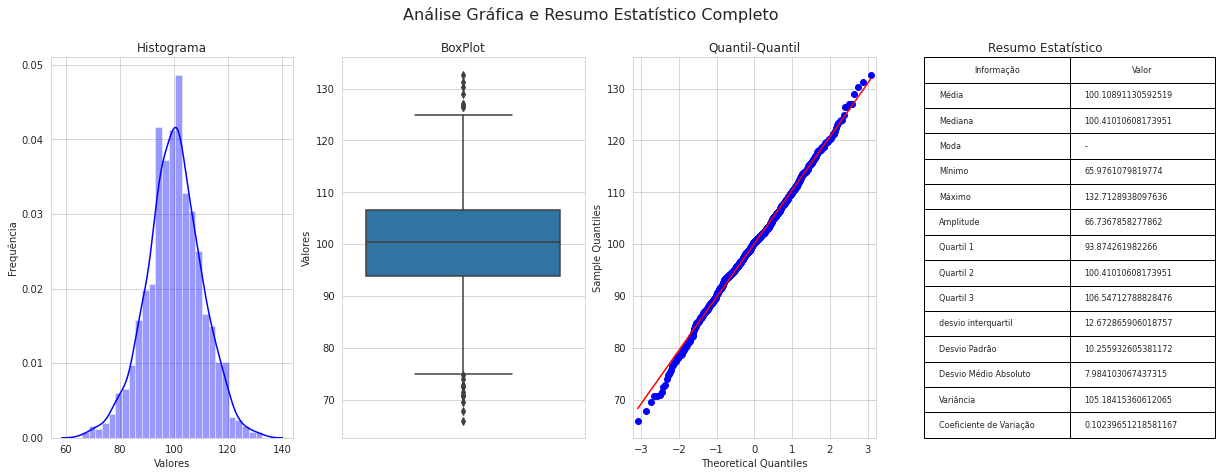

In [6]:
# Definicação do Estilo de plano de fundo (grid) para os Gráficos
sns.set_style("whitegrid")

# dist receberá a distribuição da qual se deseja extrair os dados
dist = dist_norm
df_dist = resumo_estatistico(dist)

# Cria a Estrutura para plotagem dos gráficos (n_lin x n_col) 
# A Estrutura somente tem de ser criada quando se deseja plotar mais de um gráfico simultâneo
fig, pos = plt.subplots(1, 4, figsize = (20, 7))

# Definição do título
fig.suptitle('Análise Gráfica e Resumo Estatístico Completo', fontsize = 16)

# Histograma
# Definição de Subtítulos e nome dos Eixos
pos[0].set_title("Histograma")
pos[0].set_xlabel("Valores")
pos[0].set_ylabel("Frequência")
sns.distplot(dist, color = 'blue', ax = pos[0])

# BoxPlot
pos[1].set_title("BoxPlot")
pos[1].set_ylabel("Valores")
sns.boxplot(dist,  orient = 'v', ax = pos[1])

# Gráfico Quantil-Quantil
pos[2].set_title("Quantil-Quantil")
qq.qqplot(dist, line = 'r', ax = pos[2])

# Resumo Estatístico
pos[3].set_title("Resumo Estatístico")
pos[3].axis('off')
pos[3].table(cellText = df_dist.values, cellLoc = 'left', colLabels = df_dist.columns, loc='center', colWidths=[0.5, 0.5], bbox = [0, 0, 1.2, 1]);

####**2.4. Simulação com uma Amostra (Teorema do Limite Central):**

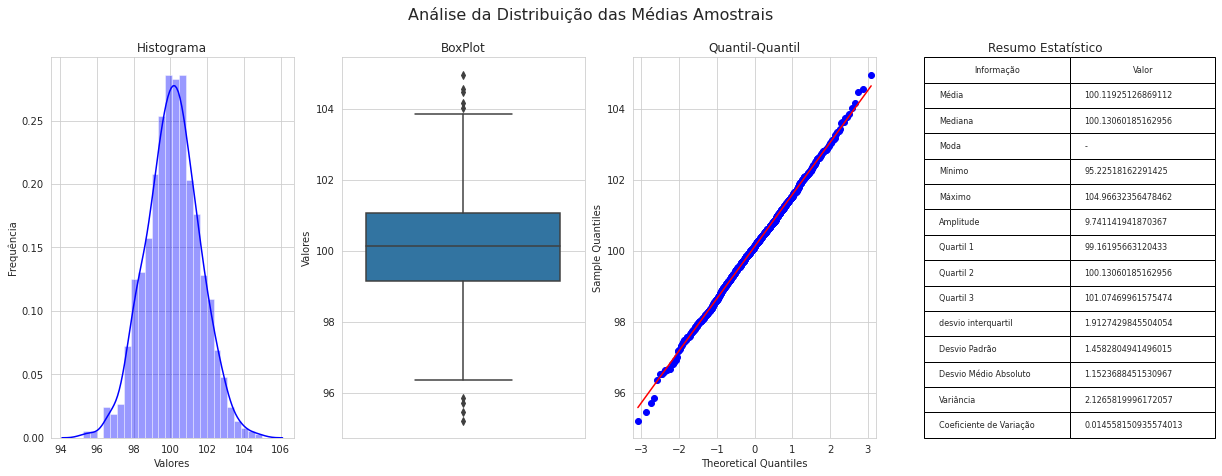

In [7]:
# dist receberá uma amostra gerada a partir da distribuição escolhida
# sendo passado para a função np.random.choice() a distribuição e o tamanho da amostra
i = 0
tam = range(0, tamanho)

# Armazenará as médias de 1000 amostras (n = tamanho da distribuição original)
# As amostras serão de tamanho = tam, geradas aleatoriamente a partir da distribuição original
med_amostras = []
for i in tam:
  aux = np.random.choice(dist_norm, 50) # Geração da amostra 
  aux = np.mean(aux) # Cálculo da média da amostra
  med_amostras.append(aux) # Adição a lista de médias
  i = i + 1

dist_med_amostras = np.array(med_amostras)
df_dist = resumo_estatistico(dist_med_amostras)

# Cria a Estrutura para plotagem dos gráficos (n_lin x n_col) 
# A Estrutura somente tem de ser criada quando se deseja plotar mais de um gráfico simultâneo
fig, pos = plt.subplots(1, 4, figsize = (20, 7))

# Definição do título
fig.suptitle('Análise da Distribuição das Médias Amostrais', fontsize = 16)

# Histograma
# Definição de Subtítulos e nome dos Eixos
pos[0].set_title("Histograma")
pos[0].set_xlabel("Valores")
pos[0].set_ylabel("Frequência")
sns.distplot(dist_med_amostras, color = 'blue', ax = pos[0])

# BoxPlot
pos[1].set_title("BoxPlot")
pos[1].set_ylabel("Valores")
sns.boxplot(dist_med_amostras,  orient = 'v', ax = pos[1])

# Gráfico Quantil-Quantil
pos[2].set_title("Quantil-Quantil")
qq.qqplot(dist_med_amostras, line = 'r', ax = pos[2])

#Resumo Estatístico
pos[3].set_title("Resumo Estatístico")
pos[3].axis('off')
pos[3].table(cellText = df_dist.values, cellLoc = 'left', colLabels = df_dist.columns, loc='center', colWidths=[0.5, 0.5], bbox = [0, 0, 1.2, 1]);

##**3. Análise Bi/Multivariada:**

###**3.1. Descrição de duas Variáveis Simples:**

In [8]:
# Criação Manual de Dados sem Contexto Prévio
data1 = [10, 7, 67, 63, 45, 42, 34, 39, 25, 21, 18, 16, 60, 2, 52, 58, 29, 9, 3, 56]
data2 = [5, 3, 65, 34, 54, 24, 43, 93, 52, 12, 81, 62, 6, 20, 25, 75, 92, 35, 13, 29]

###Resumo Estatístico
# Cálculo de Correlação a partir da Biblioteca NumPy.corrcoef
# Entrada: Matriz N-Dimensional
correlacao = np.corrcoef(data1, data2)

# Cálculo de Covariância a partir da Biblioteca NumPy.cov
# Os dados podem ser concatenados em uma única matriz, onde cada linha é uma variável
# E cada coluna uma observação de cada variável
data = np.array([data1, data2])
covariancia = np.cov(data)

# Outra opção é a passagem de duas matrizes separadas Uni-Dimensionais
cov = np.cov(data1, data2)

print("- Matriz de Correlação gerada a partir da Biblioteca NumPy.corrcoef: \n", correlacao)
print("\n- Matriz de Covariância gerada a partir da Biblioteca NumPy.cov: \n", covariancia)

- Matriz de Correlação gerada a partir da Biblioteca NumPy.corrcoef: 
 [[1.         0.23270192]
 [0.23270192 1.        ]]

- Matriz de Covariância gerada a partir da Biblioteca NumPy.cov: 
 [[470.58947368 147.29473684]
 [147.29473684 851.39736842]]


###**3.2. Base de Dados (*Tips*):**

In [9]:
# Importação da base de dados "Tips"
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


#####**3.2.1. Matriz de Correlação (Bill x Tip):**

In [10]:
# Matriz de Correlação entre 'total_bill' , 'tip' e 'size'
t1 = tips['total_bill']
t2 = tips['tip']

data = np.array([t1, t2])
corr_tips = np.corrcoef(data)

df_corr = pd.DataFrame(corr_tips, index = ['total_bill', 'tip'], columns = ['total_bill', 'tip'])
print("\n- Matriz de Correlação Conta x Gorjeta:")
df_corr


- Matriz de Correlação Conta x Gorjeta:


,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


#####**3.2.2. Tabela de Cruzamento de Dados (Bill x Tip):**

In [11]:
# Exemplo de Tabela de Cruzamento
t1_int = pd.cut(t1, 4)
t2_int = pd.cut(t2, 4)
tab_cruz = pd.crosstab(t1_int, t2_int)
print("- Exemplo de Tabela de Cruzamento (Conta x Gorjeta):")
tab_cruz

- Exemplo de Tabela de Cruzamento (Conta x Gorjeta):


tip,"(0.991, 3.25]","(3.25, 5.5]","(5.5, 7.75]","(7.75, 10.0]"
total_bill,,,,
"(3.022, 15.005]",75,5,0,0
"(15.005, 26.94]",73,43,3,0
"(26.94, 38.875]",13,16,5,0
"(38.875, 50.81]",2,5,2,2


#####**3.2.3. Tabela Pivot (Sex x Smoker):**

In [12]:
# Exemplo de Tabela Pivot (pivot_table)
print("\n- Exemplo de Tabela Pivot (Sex & Smoker): \n")
tips.pivot_table(values = 'tip', index = ['sex', 'smoker', 'time'], aggfunc = 'count', margins = True)


- Exemplo de Tabela Pivot (Sex & Smoker): 



tip
sex    smoker time       
Male   Yes    Lunch    13
              Dinner   47
       No     Lunch    20
              Dinner   77
Female Yes    Lunch    10
              Dinner   23
       No     Lunch    25
              Dinner   29
All                   244

###**3.3. Análise Gráfica Simples (*Tips*):**

#####**3.3.1. BarPlot (Bill x Tip):**

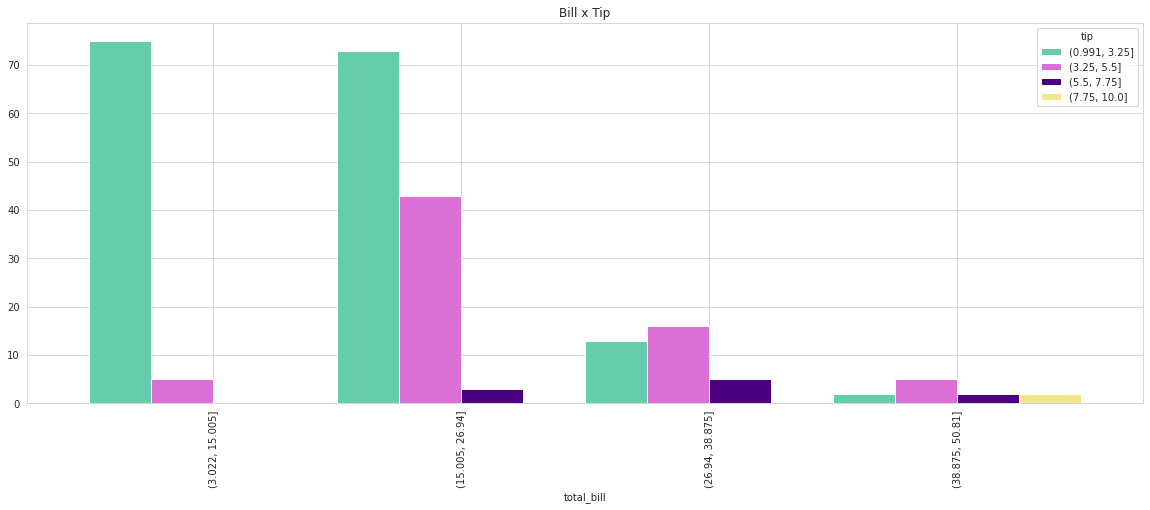

In [13]:
# Estrutura para plotagem do BarPlot (Opcional)
fig, axis = plt.subplots(1, 1, figsize = (20, 7))

# Gráfico de Barras - Matplotlib + Pandas
tab_cruz.plot(kind='bar', width = 1.0, color=['mediumaquamarine','orchid','indigo','khaki'], title='Bill x Tip' , ax = axis);

#####**3.3.2. Heatmap - Correlação (Completo):**

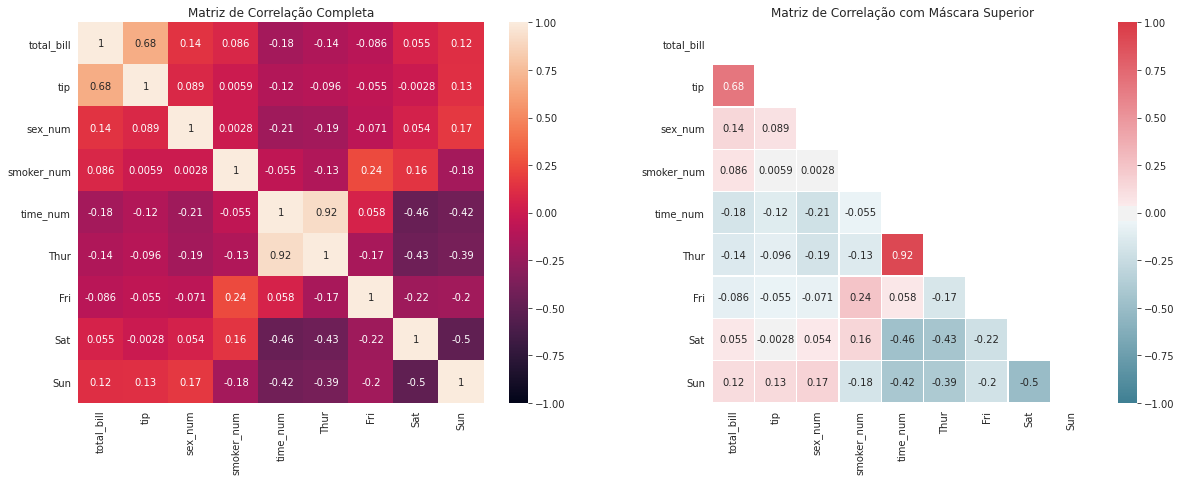

In [14]:
# Estrutura para plotagem dos Gráficos
fig, axis = plt.subplots(1, 2, figsize = (20, 7))

# Gerando uma nova paleta de cores
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Obtenção do DataFrame com os dados númericos da base de dados Tips:
df_tips_num = tips_numerico(tips)
df_tips_num = df_tips_num.drop(columns=['day_num', 'size'])

# Cálculo de Correlação a partir da Biblioteca Pandas.DataFrame.corr()
axis[0].set_title("Matriz de Correlação Completa")
sns.heatmap(df_tips_num.corr(), annot = True, ax = axis[0] , vmin = -1, vmax = 1);

# Máscara para a matriz triangular superior
mask = np.triu(np.ones_like(df_tips_num.corr(), dtype=np.bool))

# HeatMap sem a matriz triangular superior
axis[1].set_title("Matriz de Correlação com Máscara Superior")
sns.heatmap(df_tips_num.corr(), mask = mask, annot = True, cmap = cmap, vmin = -1, vmax= 1, center = 0, square = True, linewidths = 0.25, ax = axis[1]);

#####**3.3.3. ScatterPlot (Bill x Tip):**

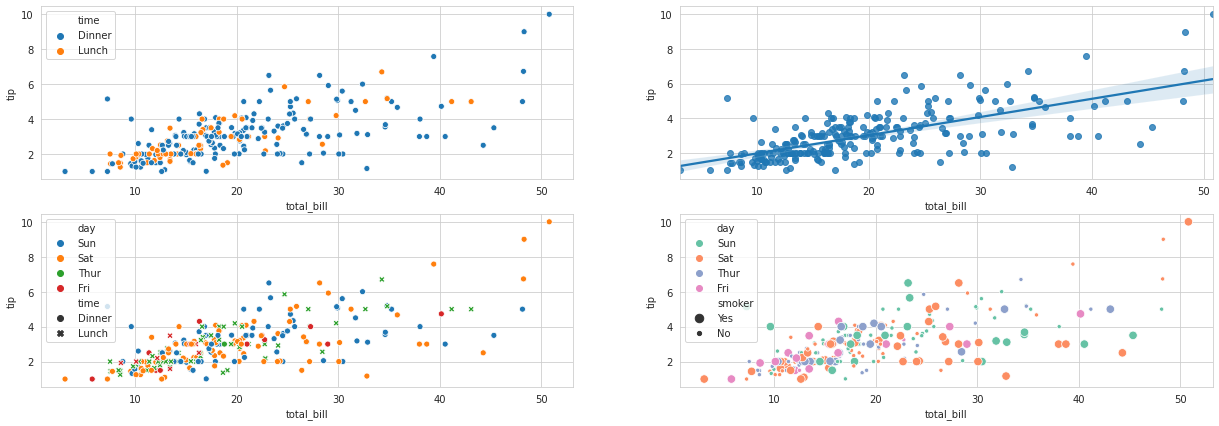

In [15]:
# Estrutura para plotagem dos Gráficos
fig, axis = plt.subplots(2, 2, figsize = (21, 7))

#ScatterPlot
sns.scatterplot(x="total_bill", y="tip", hue="time", data=tips, ax = axis[0, 0]);

#sns.lmplot(x="total_bill", y="tip", hue="time", data=tips);
sns.regplot(x="total_bill", y="tip", data=tips, ax = axis[0, 1]);
sns.scatterplot(x="total_bill", y="tip", hue="day", style="time", data=tips, ax = axis[1, 0]);
sns.scatterplot(x="total_bill", y="tip", hue="day", size="smoker", palette="Set2", data=tips, ax = axis[1,1]);

###**3.4. Análise Gráfica Dinâmica:**


####**3.4.1. Base de dados "COVID-19 Cases":**

In [16]:
# Importação e Visualização dos dados
# Base de dados COVID-19 Cases
data_covid_19 = pd.read_csv("/content/covid_19_clean_complete.csv", sep=',', parse_dates=['Date'])
data_covid_19

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.00000,65.000000,2020-01-22,0,0,0
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0
...,...,...,...,...,...,...,...,...
19831,Falkland Islands (Islas Malvinas),United Kingdom,-51.79630,-59.523600,2020-04-06,2,0,0
19832,Saint Pierre and Miquelon,France,46.88520,-56.315900,2020-04-06,1,0,0
19833,NaN,South Sudan,6.87700,31.307000,2020-04-06,1,0,0
19834,NaN,Western Sahara,24.21550,-12.885800,2020-04-06,4,0,0


####**3.4.2. Análise e Tratamento dos dados gerais:**

In [17]:
data_covid_19.info()
df_data = data_covid_19

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19836 entries, 0 to 19835
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  6080 non-null   object        
 1   Country/Region  19836 non-null  object        
 2   Lat             19836 non-null  float64       
 3   Long            19836 non-null  float64       
 4   Date            19836 non-null  datetime64[ns]
 5   Confirmed       19836 non-null  int64         
 6   Deaths          19836 non-null  int64         
 7   Recovered       19836 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 1.2+ MB


In [18]:
# Casos ativos = Casos Confirmados - Mortes - Casos Recoperados
df_data['Active'] = df_data['Confirmed'] - df_data['Deaths'] - df_data['Recovered']

# Subistituindo Mainland China por China
df_data['Country/Region'] = df_data['Country/Region'].replace('Mainland China', 'China')

# Preenchendo missing values 
df_data[['Province/State']] = df_data[['Province/State']].fillna('')
df_data[['Confirmed', 'Deaths', 'Recovered', 'Active']] = df_data[['Confirmed', 'Deaths', 'Recovered', 'Active']].fillna(0)

# Convertendo datatypes
df_data['Recovered'] = df_data['Recovered'].astype(int)

# imprimindo 5 primeiras linhas
df_data

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,,Afghanistan,33.00000,65.000000,2020-01-22,0,0,0,0
1,,Albania,41.15330,20.168300,2020-01-22,0,0,0,0
2,,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0
3,,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0
4,,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0
...,...,...,...,...,...,...,...,...,...
19831,Falkland Islands (Islas Malvinas),United Kingdom,-51.79630,-59.523600,2020-04-06,2,0,0,2
19832,Saint Pierre and Miquelon,France,46.88520,-56.315900,2020-04-06,1,0,0,1
19833,,South Sudan,6.87700,31.307000,2020-04-06,1,0,0,1
19834,,Western Sahara,24.21550,-12.885800,2020-04-06,4,0,0,4


####**3.4.3. Análise e Tratamento dos dados temporais:**

In [19]:
df_data.Date.describe()

count                   19836
unique                     76
top       2020-01-25 00:00:00
freq                      261
first     2020-01-22 00:00:00
last      2020-04-06 00:00:00
Name: Date, dtype: object

In [20]:
# Obtem o numero de casos confirmados, mortes, recuperados e ativos agrupado por data e por região.
df_data_group = df_data.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()

# Ordena o dataframe por mais casos confirmados
df_data_group.sort_values(by='Confirmed', ascending=False)

,Date,Country/Region,Confirmed,Deaths,Recovered,Active
13971,2020-04-06,US,366614,10783,19581,336250
13787,2020-04-05,US,337072,9619,17448,310005
13603,2020-04-04,US,308850,8407,14652,285791
13419,2020-04-03,US,275586,7087,9707,258792
13235,2020-04-02,US,243453,5926,9001,228526
...,...,...,...,...,...,...
8756,2020-03-09,Mauritania,0,0,0,0
4967,2020-02-17,Zimbabwe,0,0,0,0
8754,2020-03-09,Mali,0,0,0,0
4968,2020-02-18,Afghanistan,0,0,0,0


In [21]:
# Agrupa quantidade de casos recuperados, mortes e ativos por data
data_temp = df_data.groupby('Date')['Recovered', 'Deaths', 'Active'].sum().reset_index()

# Remodela o dataframe com variável e valor para ter quantidades de recuperados, mortos e ativos
data_temp = data_temp.melt(id_vars="Date", value_vars=['Recovered', 'Deaths', 'Active'],
                 var_name='Case', value_name='Count')
data_temp

,Date,Case,Count
0,2020-01-22,Recovered,28
1,2020-01-23,Recovered,30
2,2020-01-24,Recovered,36
3,2020-01-25,Recovered,39
4,2020-01-26,Recovered,52
...,...,...,...
223,2020-04-02,Active,751644
224,2020-04-03,Active,813507
225,2020-04-04,Active,889225
226,2020-04-05,Active,945742


####**3.4.4. Gráficos Dinâmicos:**

#####**3.4.4.1. Casos ao longo do tempo (Gráfico de linhas):**

In [22]:
# habilita modo offline
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

# Definindo o renderizador:
pio.renderers
pio.renderers.default = "colab"

# Cores
recuperados = '#21bf73'
mortes = '#ff2e63'
ativos = '#fe9801'

fig = px.area(data_temp, 
              x="Date", 
              y="Count", 
              color='Case', 
              height=600,
              title='Casos ao longo do tempo',
              color_discrete_sequence = [recuperados, mortes, ativos])
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show()

#####**3.4.4.2. Casos ao longo do tempo (Choropleth):**

In [23]:
# Mapa de Choropleth é um mapa composto por polígonos coloridos. 
# É usado para representar variações espaciais de uma quantidade
fig = px.choropleth(df_data_group,                                                 # casos agrupados por país
                    locations="Country/Region",                                    # definindo as regiões no mapa
                    locationmode='country names',                                  # define o modo de localização para todas regiões
                    color=np.log(df_data_group["Confirmed"]),                      # define a cor pelo o valor de casos confirmados (aplica o log)
                    hover_name='Country/Region',                                   # define o texto interativo com o nome da região
                    hover_data=["Confirmed", "Deaths"],                            # define o texto interativo com o numero de casos confirmasos e mortes
                    animation_frame=df_data_group["Date"].dt.strftime('%d-%m-%Y'), # define o animate_frame com as datas
                    title='Casos ao longo do tempo',                               # define título
                    color_continuous_scale=px.colors.sequential.Magenta)           # define a paleta de cores
fig.update_layout(autosize=False, width=1200, height=800)                          # define tamanho da figura
fig.show()

#####**3.4.4.3. Mortes ao longo do tempo (Choropleth):**

In [24]:
# Mapa de Choropleth é um mapa composto por polígonos coloridos. 
# É usado para representar variações espaciais de uma quantidade
fig = px.choropleth(df_data_group,                                                   # casos agrupados por país
                    locations="Country/Region",                                    # definindo as regiões no mapa
                    locationmode='country names',                                  # define o modo de localização para todas regiões
                    color=np.log(df_data_group["Deaths"]),                        # define a cor pelo o valor de casos confirmados (aplica o log)
                    hover_name='Country/Region',                                   # define o texto interativo com o nome da região
                    hover_data=["Confirmed", "Deaths"],                            # define o texto interativo com o numero de casos confirmasos e mortes
                    animation_frame=df_data_group["Date"].dt.strftime('%d-%m-%Y'),   # define o animate_frame com as datas
                    title='Mortes ao longo do tempo',                               # define título
                    color_continuous_scale=px.colors.sequential.Magenta)           # define a paleta de cores
fig.update_layout(autosize=False, width=1200, height=800)
fig.show()

#####**3.4.4.4. Visão Geral - 06/04/2020 (Gráfico com Folium):**

In [26]:
# Obtem os dados do último dia da base de dados
data_temp = df_data[df_data['Date'] == max(df_data['Date'])]

m = folium.Map(location=[0, 0], tiles='cartodbpositron',
               min_zoom=1, max_zoom=4, zoom_start=1)

for i in range(0, len(data_temp)):
    folium.Circle(
        location=[data_temp.iloc[i]['Lat'], data_temp.iloc[i]['Long']],
        color='crimson', fill='crimson',
        tooltip =   '<li><bold>Country : '+str(data_temp.iloc[i]['Country/Region'])+
                    '<li><bold>Province : '+str(data_temp.iloc[i]['Province/State'])+
                    '<li><bold>Confirmed : '+str(data_temp.iloc[i]['Confirmed'])+
                    '<li><bold>Deaths : '+str(data_temp.iloc[i]['Deaths']),
        radius=int(data_temp.iloc[i]['Confirmed'])**1.1).add_to(m)
m